In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
from scipy.sparse import csr_matrix
import scipy
from tqdm import tqdm
from diffprivlib.mechanisms import GeometricTruncated

import warnings

warnings.filterwarnings("ignore")

In [2]:
# Read text file to pandas dataframe
df_phenotype = pd.read_csv("./data/GSE176269_CovidStudy_phenotype_061721.txt", sep="\t", header=0, index_col=0)
df_phenotype

,sampID,plateID,status,donorID,cDate,age,sex,tSNE1,tSNE2,group,cellType,SARS.CoV.2,fluA
Cov0401_GGACCCTATTCA,Cov04,Cov0401,COVID-19,2,15-May-20,56,M,0.118864,0.742498,macro,M1-mac-exp,0,0
Cov0401_TGCTCCTGAAGG,Cov04,Cov0401,COVID-19,2,15-May-20,56,M,0.902416,0.628060,neutrophil,G5c_aged,76,0
Cov0401_TTAAGGTCTCCA,Cov04,Cov0401,COVID-19,2,15-May-20,56,M,0.173427,0.764255,macro,M1-mac-exp,0,0
Cov0401_AGGACACTTGCC,Cov04,Cov0401,COVID-19,2,15-May-20,56,M,0.165173,0.624170,macro,M2-mac,0,0
Cov0401_CGTTATCGCCAT,Cov04,Cov0401,COVID-19,2,15-May-20,56,M,0.138493,0.738781,macro,M1-mac-exp,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
f8104_CACCAGGTTACC,f81,f8104,fluA,29,21-Feb-20,41,F,0.795598,0.371404,neutrophil,G5c_naive,0,0
f8104_CCAACTGCGGTC,f81,f8104,fluA,29,21-Feb-20,41,F,0.102565,0.773771,macro,M1-mac-exp,0,0
f8104_CCTGTGACATTA,f81,f8104,fluA,29,21-Feb-20,41,F,0.085186,0.673992,macro,IFNexp-mac,0,0
f8104_TTAAGAGTTAGA,f81,f8104,fluA,29,21-Feb-20,41,F,0.090483,0.651792,macro,IFNexp-mac,0,0


In [3]:
# Read text file to pandas dataframe
df_row_count = pd.read_csv("./data/GSE176269_CovidStudy_rawCounts_061721.txt", sep="\t", header=0, index_col=0)

# Transpose the count matrix DataFrame to have cells as rows and genes as columns
df_row_count = df_row_count.T
df_row_count

,RNF14,RP11-670E13.6,UBE2Q2,RNF10,RNF11,RNF13,C16orf13,GBP5,UCHL5,RP11-433M22.2,...,AC008175.1,MIR424,MIR219A1,RF02180,TAS2R43,MIR1912,MIR6829,MIR4283-1,GOLGA6B,OR4F21
Cov0401_GGACCCTATTCA,0,0,0,0,0,0,0,6,0,0,...,0,0,0,0,0,0,0,0,0,0
Cov0401_TGCTCCTGAAGG,0,0,0,0,0,2,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
Cov0401_TTAAGGTCTCCA,0,0,0,0,1,2,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
Cov0401_AGGACACTTGCC,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cov0401_CGTTATCGCCAT,0,0,1,0,0,0,1,15,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f8104_CACCAGGTTACC,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
f8104_CCAACTGCGGTC,0,0,0,0,0,0,0,5,1,0,...,0,0,0,0,0,0,0,0,0,0
f8104_CCTGTGACATTA,0,0,0,0,0,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,0
f8104_TTAAGAGTTAGA,0,0,0,0,0,1,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Convert the count matrix DataFrame to a sparse matrix
count_matrix_sparse = csr_matrix(df_row_count.values)

In [5]:
# Create an AnnData object and populate its attributes
adata = sc.AnnData(X=count_matrix_sparse,
                   obs=df_phenotype,
                   var=pd.DataFrame(index=df_row_count.columns),
                   obsm=None,
                   layers=None)

In [6]:
adata

AnnData object with n_obs × n_vars = 29406 × 41442
    obs: 'sampID', 'plateID', 'status', 'donorID', 'cDate', 'age', 'sex', 'tSNE1', 'tSNE2', 'group', 'cellType', 'SARS.CoV.2', 'fluA'

In [7]:
# Save adata
save_file = "./data/GSE176269_raw.h5ad"
adata.write_h5ad(save_file)

In [8]:
# print the number of unique samples
print("Number of unique samples: ", len(adata.obs["plateID"].unique()))

# print the number of patinets/individuals
print("Number of unique samples: ", len(adata.obs["sampID"].unique()))

Number of unique samples:  116
Number of unique samples:  28


In [9]:
# Print the unque values of the "sampID" column
print("Unique values of sampID: ", adata.obs["sampID"].unique())

Unique values of sampID:  ['Cov04', 'Cov05', 'Cov06', 'Cov12', 'Cov14', ..., 'f83', 'f83a', 'f84', 'f80', 'f81']
Length: 28
Categories (28, object): ['Cov04', 'Cov05', 'Cov06', 'Cov10N', ..., 'f82b', 'f83', 'f83a', 'f84']


In [10]:
# Print the unque values of the "plateID" column
print("Unique values of sampID: ", adata.obs["plateID"].unique())

# print the number of samples for each plateID
print("Number of samples for each plateID: ", adata.obs["plateID"].value_counts())



Unique values of sampID:  ['Cov0401', 'Cov0402', 'Cov0403', 'Cov0404', 'Cov0501', ..., 'f8004', 'f8101', 'f8102', 'f8103', 'f8104']
Length: 116
Categories (116, object): ['Cov10N01', 'Cov10N02', 'Cov10N03', 'Cov10N04', ..., 'f8401', 'f8402', 'f8403', 'f8404']
Number of samples for each plateID:  f82b02     732
f82b03     709
HC4201     664
f7801      663
HC4202     642
          ... 
f8201       26
HC3603      23
HC1701      20
Cov0403     19
Cov0404     17
Name: plateID, Length: 116, dtype: int64


In [11]:
count = {'covid': 0, 'flu': 0, 'control': 0}
count_covid_non_covid = {'covid': 0, 'non-covid': 0}
for sample in adata.obs["plateID"].value_counts().index:
    if 'Cov' in sample:
        count['covid']+=1
        count_covid_non_covid['covid']+=1
    elif 'HC' in sample:
        count['control']+=1
        count_covid_non_covid['non-covid']+=1
    else:
        count['flu']+=1
        count_covid_non_covid['non-covid']+=1
        
print(count)
print(count_covid_non_covid)
        

{'covid': 32, 'flu': 56, 'control': 28}
{'covid': 32, 'non-covid': 84}


In [12]:
# Run PCA and neighbour graph on the adata_train. 
# sc.pp.neighbors(adata, n_pcs = 30, n_neighbors = 20) 
# sc.tl.pca(adata)
# sc.tl.umap(adata)

# sc.pl.pca(adata, color="plateID")
# sc.pl.umap(adata, color="plateID")

In [13]:
print(adata.obs["plateID"].value_counts())


f82b02     732
f82b03     709
HC4201     664
f7801      663
HC4202     642
          ... 
f8201       26
HC3603      23
HC1701      20
Cov0403     19
Cov0404     17
Name: plateID, Length: 116, dtype: int64


In [14]:
adata.var

""
RNF14
RP11-670E13.6
UBE2Q2
RNF10
RNF11
...
MIR1912
MIR6829
MIR4283-1
GOLGA6B


In [15]:
# mitochondrial genes
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes.
adata.var["hb"] = adata.var_names.str.contains(("^HB[^(P)]"))

adata.var

,mt,ribo,hb
RNF14,False,False,False
RP11-670E13.6,False,False,False
UBE2Q2,False,False,False
RNF10,False,False,False
RNF11,False,False,False
...,...,...,...
MIR1912,False,False,False
MIR6829,False,False,False
MIR4283-1,False,False,False
GOLGA6B,False,False,False


In [16]:
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt", "ribo", "hb"], percent_top=None, log1p=False, inplace=True)

In [17]:
adata.obs

,sampID,plateID,status,donorID,cDate,age,sex,tSNE1,tSNE2,group,...,SARS.CoV.2,fluA,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,total_counts_hb,pct_counts_hb
Cov0401_GGACCCTATTCA,Cov04,Cov0401,COVID-19,2,15-May-20,56,M,0.118864,0.742498,macro,...,0,0,855,1947.0,79.0,4.057524,24.0,1.232666,0.0,0.000000
Cov0401_TGCTCCTGAAGG,Cov04,Cov0401,COVID-19,2,15-May-20,56,M,0.902416,0.628060,neutrophil,...,76,0,475,974.0,17.0,1.745380,2.0,0.205339,0.0,0.000000
Cov0401_TTAAGGTCTCCA,Cov04,Cov0401,COVID-19,2,15-May-20,56,M,0.173427,0.764255,macro,...,0,0,1065,2379.0,146.0,6.137033,66.0,2.774275,0.0,0.000000
Cov0401_AGGACACTTGCC,Cov04,Cov0401,COVID-19,2,15-May-20,56,M,0.165173,0.624170,macro,...,0,0,722,990.0,27.0,2.727273,48.0,4.848485,0.0,0.000000
Cov0401_CGTTATCGCCAT,Cov04,Cov0401,COVID-19,2,15-May-20,56,M,0.138493,0.738781,macro,...,0,0,1324,2594.0,45.0,1.734773,60.0,2.313030,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f8104_CACCAGGTTACC,f81,f8104,fluA,29,21-Feb-20,41,F,0.795598,0.371404,neutrophil,...,0,0,328,516.0,10.0,1.937984,0.0,0.000000,0.0,0.000000
f8104_CCAACTGCGGTC,f81,f8104,fluA,29,21-Feb-20,41,F,0.102565,0.773771,macro,...,0,0,471,850.0,58.0,6.823529,8.0,0.941176,1.0,0.117647
f8104_CCTGTGACATTA,f81,f8104,fluA,29,21-Feb-20,41,F,0.085186,0.673992,macro,...,0,0,574,1108.0,45.0,4.061372,22.0,1.985560,0.0,0.000000
f8104_TTAAGAGTTAGA,f81,f8104,fluA,29,21-Feb-20,41,F,0.090483,0.651792,macro,...,0,0,560,811.0,15.0,1.849568,11.0,1.356350,1.0,0.123305


In [18]:
# Check whethe the matrix: adata.X is sparse or not.
scipy.sparse.issparse(adata.X)

True

In [19]:
mito_genes = adata.var_names.str.startswith("MT-")
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
# adata.obs['percent_mt2'] = np.sum(
#     adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
# # add the total counts per cell as observations-annotation to adata
# adata.obs['n_counts'] = adata.X.sum(axis=1).A1


adata.obs["percent_mt2"] = np.sum(adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1)
# add the total counts per cell as observations-annotation to adata
adata.obs["n_counts"] = adata.X.sum(axis=1)

In [20]:
adata

AnnData object with n_obs × n_vars = 29406 × 41442
    obs: 'sampID', 'plateID', 'status', 'donorID', 'cDate', 'age', 'sex', 'tSNE1', 'tSNE2', 'group', 'cellType', 'SARS.CoV.2', 'fluA', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [21]:
# sc.set_figure_params(figsize=(14, 8))
# sc.pl.violin(adata, ["n_genes_by_counts"], jitter=0.4, groupby="plateID", rotation=45)

In [22]:
# sc.pl.violin(adata, ["total_counts"], jitter=0.4, groupby="plateID", rotation=45)

In [23]:
# sc.pl.violin(adata, ["pct_counts_mt"], jitter=0.4, groupby="plateID", rotation=45)

In [24]:
#sc.pl.violin(adata, ["pct_counts_ribo"], jitter=0.4, groupby="plateID", rotation=45)

In [25]:
#sc.pl.violin(adata, ["pct_counts_hb"], jitter=0.4, groupby="plateID", rotation=45)

In [26]:
# sc.set_figure_params(figsize=None)
# sc.pl.scatter(adata, x="total_counts", y="pct_counts_mt", color="plateID")

In [27]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

print(adata.n_obs, adata.n_vars)

29341 31652


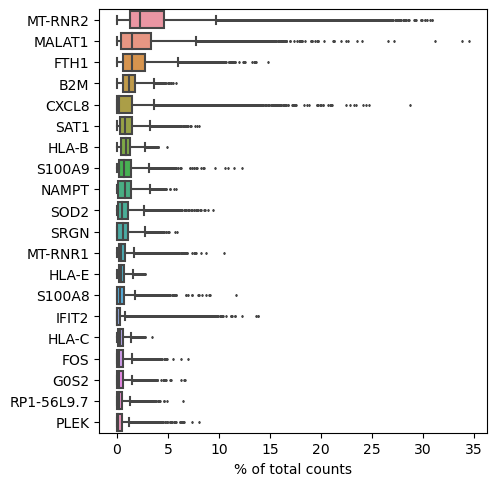

In [28]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [29]:
print(len(adata[adata.obs["pct_counts_mt"] < 20, :]))
print(len(adata[adata.obs["pct_counts_ribo"] > 5, :]))
# 114701
# 7280

28398
3368


In [30]:
# filter for percent mito
adata = adata[adata.obs["pct_counts_mt"] < 20, :]

# Don't filter by the percent of ribosome
# filter for percent ribo > 0.05
# adata = adata[adata.obs['pct_counts_ribo'] > 5, :]

print("Remaining cells %d" % adata.n_obs)

Remaining cells 28398


In [31]:
print(adata.obs["plateID"].value_counts())

f82b02     695
f82b03     676
HC4201     653
f7801      646
HC4202     638
          ... 
f8201       25
HC3603      22
HC1701      20
Cov0403     17
Cov0404     17
Name: plateID, Length: 116, dtype: int64


In [32]:
# sc.set_figure_params(figsize=(14, 8))
# sc.pl.violin(adata, ["n_genes_by_counts"], jitter=0.4, groupby="plateID", rotation=45)

In [33]:
# sc.pl.violin(adata, ["total_counts"], jitter=0.4, groupby="plateID", rotation=45)

In [34]:
# sc.pl.violin(adata, ["pct_counts_mt"], jitter=0.4, groupby="plateID", rotation=45)

In [35]:
# sc.pl.violin(adata, ["pct_counts_ribo"], jitter=0.4, groupby="plateID", rotation=45)

In [36]:
# sc.pl.violin(adata, ["pct_counts_hb"], jitter=0.4, groupby="plateID", rotation=45)

In [37]:
malat1 = adata.var_names.str.startswith("MALAT1")
# we need to redefine the mito_genes since they were first
# calculated on the full object before removing low expressed genes.
mito_genes = adata.var_names.str.startswith("MT-")
hb_genes = adata.var_names.str.contains("^HB[^(P)]")

remove = np.add(mito_genes, malat1)
remove = np.add(remove, hb_genes)
keep = np.invert(remove)

adata = adata[:, keep]

print(adata.n_obs, adata.n_vars)

28398 31604


In [38]:
cell_cycle_genes = [x.strip() for x in open("./data/regev_lab_cell_cycle_genes.txt")]
print(len(cell_cycle_genes))

# Split into 2 lists
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]
print(len(cell_cycle_genes))

97
96


 Before running cell cycle we have to normalize the data. In the scanpy object, the data slot will be overwritten with the normalized data. So first, save the raw data into the slot `raw`.  <br><br>Then run normalization, logarimize and scale the data.


In [39]:
# save normalized counts in raw slot.
adata.raw = adata

# # normalize to depth 10 000
# sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.normalize_total(adata)

# logaritmize
sc.pp.log1p(adata)

# scale
# sc.pp.scale(adata)

In [40]:
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

In [41]:
adata.obs

,sampID,plateID,status,donorID,cDate,age,sex,tSNE1,tSNE2,group,...,total_counts_ribo,pct_counts_ribo,total_counts_hb,pct_counts_hb,percent_mt2,n_counts,n_genes,S_score,G2M_score,phase
Cov0401_GGACCCTATTCA,Cov04,Cov0401,COVID-19,2,15-May-20,56,M,0.118864,0.742498,macro,...,24.0,1.232666,0.0,0.000000,0.040575,1947.0,855,0.013194,-0.114826,S
Cov0401_TGCTCCTGAAGG,Cov04,Cov0401,COVID-19,2,15-May-20,56,M,0.902416,0.628060,neutrophil,...,2.0,0.205339,0.0,0.000000,0.017454,974.0,475,-0.008493,-0.053779,G1
Cov0401_TTAAGGTCTCCA,Cov04,Cov0401,COVID-19,2,15-May-20,56,M,0.173427,0.764255,macro,...,66.0,2.774275,0.0,0.000000,0.061370,2379.0,1065,-0.027601,-0.139912,G1
Cov0401_AGGACACTTGCC,Cov04,Cov0401,COVID-19,2,15-May-20,56,M,0.165173,0.624170,macro,...,48.0,4.848485,0.0,0.000000,0.027273,990.0,722,-0.003791,-0.053779,G1
Cov0401_CGTTATCGCCAT,Cov04,Cov0401,COVID-19,2,15-May-20,56,M,0.138493,0.738781,macro,...,60.0,2.313030,0.0,0.000000,0.017348,2594.0,1324,0.044283,-0.087263,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f8104_TACGGACGACTC,f81,f8104,fluA,29,21-Feb-20,41,F,0.085383,0.673112,macro,...,20.0,1.790510,0.0,0.000000,0.020591,1117.0,693,-0.042463,-0.078488,G1
f8104_CACCAGGTTACC,f81,f8104,fluA,29,21-Feb-20,41,F,0.795598,0.371404,neutrophil,...,0.0,0.000000,0.0,0.000000,0.019380,516.0,328,-0.008493,-0.047965,G1
f8104_CCAACTGCGGTC,f81,f8104,fluA,29,21-Feb-20,41,F,0.102565,0.773771,macro,...,8.0,0.941176,1.0,0.117647,0.068235,850.0,471,-0.012739,-0.065407,G1
f8104_CCTGTGACATTA,f81,f8104,fluA,29,21-Feb-20,41,F,0.085186,0.673992,macro,...,22.0,1.985560,0.0,0.000000,0.040614,1108.0,574,0.045496,-0.009851,S


In [42]:
# sc.set_figure_params(figsize=(10, 3))
# sc.pl.violin(adata, ["S_score"], jitter=0.4, groupby="plateID", rotation=45)

In [43]:
# sc.pl.violin(adata, ["G2M_score"], jitter=0.4, groupby="plateID", rotation=45)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.63
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 15.9%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 1.3%
Elapsed time: 27.2 seconds


61

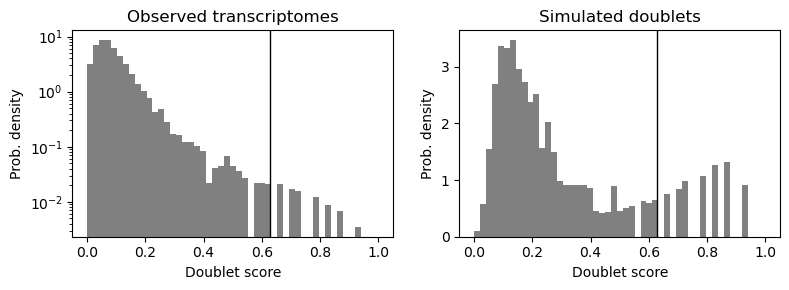

In [44]:
import scrublet as scr

scrub = scr.Scrublet(adata.raw.X)
adata.obs["doublet_scores"], adata.obs["predicted_doublets"] = scrub.scrub_doublets()
scrub.plot_histogram()

sum(adata.obs["predicted_doublets"])

In [45]:
# add in column with singlet/doublet instead of True/False
adata.obs["doublet_info"] = adata.obs["predicted_doublets"].astype(str)

In [46]:
adata.obs

,sampID,plateID,status,donorID,cDate,age,sex,tSNE1,tSNE2,group,...,pct_counts_hb,percent_mt2,n_counts,n_genes,S_score,G2M_score,phase,doublet_scores,predicted_doublets,doublet_info
Cov0401_GGACCCTATTCA,Cov04,Cov0401,COVID-19,2,15-May-20,56,M,0.118864,0.742498,macro,...,0.000000,0.040575,1947.0,855,0.013194,-0.114826,S,0.031093,False,False
Cov0401_TGCTCCTGAAGG,Cov04,Cov0401,COVID-19,2,15-May-20,56,M,0.902416,0.628060,neutrophil,...,0.000000,0.017454,974.0,475,-0.008493,-0.053779,G1,0.223975,False,False
Cov0401_TTAAGGTCTCCA,Cov04,Cov0401,COVID-19,2,15-May-20,56,M,0.173427,0.764255,macro,...,0.000000,0.061370,2379.0,1065,-0.027601,-0.139912,G1,0.045986,False,False
Cov0401_AGGACACTTGCC,Cov04,Cov0401,COVID-19,2,15-May-20,56,M,0.165173,0.624170,macro,...,0.000000,0.027273,990.0,722,-0.003791,-0.053779,G1,0.119048,False,False
Cov0401_CGTTATCGCCAT,Cov04,Cov0401,COVID-19,2,15-May-20,56,M,0.138493,0.738781,macro,...,0.000000,0.017348,2594.0,1324,0.044283,-0.087263,S,0.066791,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f8104_TACGGACGACTC,f81,f8104,fluA,29,21-Feb-20,41,F,0.085383,0.673112,macro,...,0.000000,0.020591,1117.0,693,-0.042463,-0.078488,G1,0.024030,False,False
f8104_CACCAGGTTACC,f81,f8104,fluA,29,21-Feb-20,41,F,0.795598,0.371404,neutrophil,...,0.000000,0.019380,516.0,328,-0.008493,-0.047965,G1,0.104369,False,False
f8104_CCAACTGCGGTC,f81,f8104,fluA,29,21-Feb-20,41,F,0.102565,0.773771,macro,...,0.117647,0.068235,850.0,471,-0.012739,-0.065407,G1,0.057551,False,False
f8104_CCTGTGACATTA,f81,f8104,fluA,29,21-Feb-20,41,F,0.085186,0.673992,macro,...,0.000000,0.040614,1108.0,574,0.045496,-0.009851,S,0.034268,False,False


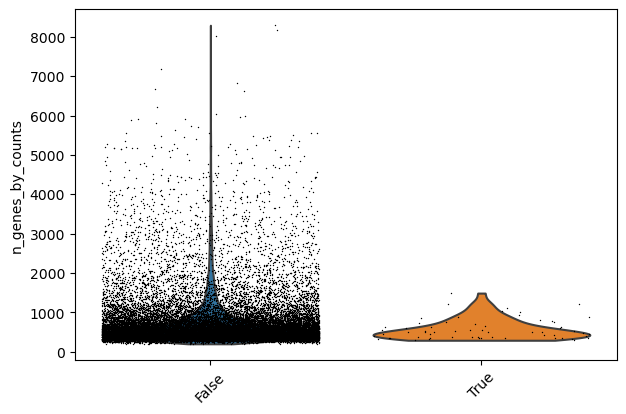

In [47]:
sc.pl.violin(adata, "n_genes_by_counts", jitter=0.4, groupby="doublet_info", rotation=45)

In [48]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]
adata

View of AnnData object with n_obs × n_vars = 28398 × 1571
    obs: 'sampID', 'plateID', 'status', 'donorID', 'cDate', 'age', 'sex', 'tSNE1', 'tSNE2', 'group', 'cellType', 'SARS.CoV.2', 'fluA', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'doublet_info_colors', 'hvg'

Once we assign the adata.raw to the adata back, we need to run
1. Doublet elimination
2. High variable gene selection

In [49]:
# also revert back to the raw counts as the main matrix in adata
adata = adata.raw.to_adata()

# Remoce doublets
adata = adata[adata.obs["doublet_info"] == "False", :]
print(adata.shape)

(28337, 31604)


In [50]:
# # normalize to depth 10 000
# sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

# # logaritmize
# sc.pp.log1p(adata)


# # store normalized counts in the raw slot, 
# # we will subset adata.X for variable genes, but want to keep all genes matrix as well.
# adata.raw = adata

adata

View of AnnData object with n_obs × n_vars = 28337 × 31604
    obs: 'sampID', 'plateID', 'status', 'donorID', 'cDate', 'age', 'sex', 'tSNE1', 'tSNE2', 'group', 'cellType', 'SARS.CoV.2', 'fluA', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'log1p', 'doublet_info_colors', 'hvg'

Select high variable genes again since we only run the previous adata, and we assigned adata.raw to the current adata

Highly variable genes: 2500


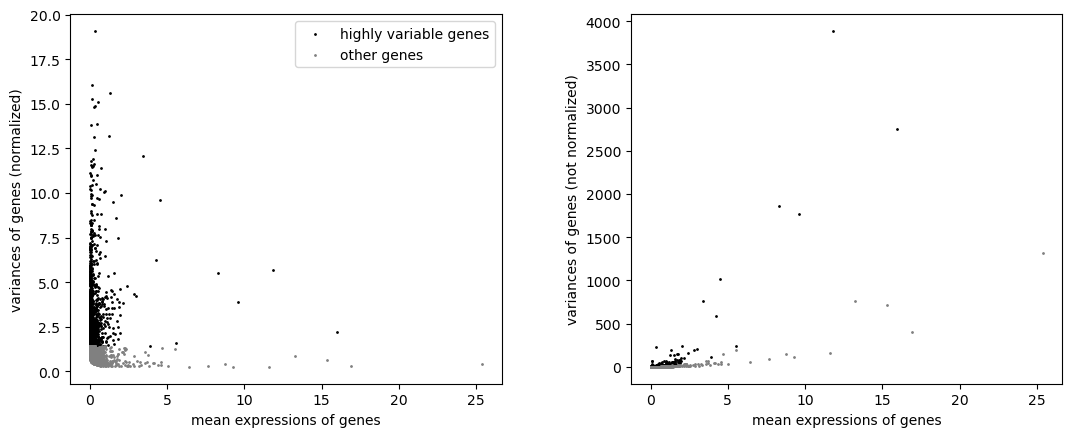

View of AnnData object with n_obs × n_vars = 28337 × 2500
    obs: 'sampID', 'plateID', 'status', 'donorID', 'cDate', 'age', 'sex', 'tSNE1', 'tSNE2', 'group', 'cellType', 'SARS.CoV.2', 'fluA', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'log1p', 'doublet_info_colors', 'hvg'

In [51]:
# compute variable genes
sc.pp.highly_variable_genes(adata, flavor='seurat_v3', n_top_genes=2500)
print("Highly variable genes: %d"%sum(adata.var.highly_variable))

#plot variable genes
sc.pl.highly_variable_genes(adata)

# subset for variable genes in the dataset
adata = adata[:, adata.var['highly_variable']]
adata


## Apply Differential Privacy to the count matrix

In [52]:
dense_adataX = adata.X.toarray().astype(int)
print("Max value in matrix: %d" % np.max(dense_adataX))

Max value in matrix: 1836


In [54]:
dense_adataX.shape

(28337, 2500)

In [55]:
def add_geometric_noise(matrix, epsilon, sensitivty, lower_bound, upper_bound):
    noisy_matrix = np.zeros_like(matrix)
    mechanism = GeometricTruncated(epsilon=epsilon, sensitivity=sensitivty, lower=lower_bound, upper=upper_bound)

    for i in tqdm(range(matrix.shape[0])):
        for j in range(matrix.shape[1]):
            noisy_matrix[i, j] = mechanism.randomise(matrix[i, j])

    return noisy_matrix

# Free up memory
adata.X = None

epsilon = 1
lower_bound = 0
upper_bound = np.max(dense_adataX)
# sensitivity = largest value of the count matrix
sensitivity = np.max(dense_adataX)
print("sensitivity: ", sensitivity)

noisy_matrix = add_geometric_noise(matrix=dense_adataX,epsilon=epsilon, 
                                   sensitivty=sensitivity, lower_bound=lower_bound, 
                                   upper_bound=upper_bound)
print(noisy_matrix)

sensitivity:  1836


100%|██████████| 28337/28337 [15:39<00:00, 30.15it/s]

[[   0  128    0 ...    0    0    0]
 [ 862  602    0 ...    0    0 1836]
 [1471    0 1836 ... 1277  491 1172]
 ...
 [1836  949    0 ... 1410    0 1836]
 [1366    0    0 ...    0    0 1836]
 [1836    0  352 ...    0    0 1836]]


In [60]:
# convert int to float for noisey_matrix
noisy_matrix = noisy_matrix.astype(float)

# Convert the count matrix DataFrame to a sparse matrix
adata.X = csr_matrix(noisy_matrix)
adata.X

<28337x2500 sparse matrix of type '<class 'numpy.float64'>'
	with 35407965 stored elements in Compressed Sparse Row format>

In [61]:
# normalize to depth 10 000
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

# logaritmize
sc.pp.log1p(adata)


# store normalized counts in the raw slot, 
# we will subset adata.X for variable genes, but want to keep all genes matrix as well.
# adata.raw = adata

adata

AnnData object with n_obs × n_vars = 28337 × 2500
    obs: 'sampID', 'plateID', 'status', 'donorID', 'cDate', 'age', 'sex', 'tSNE1', 'tSNE2', 'group', 'cellType', 'SARS.CoV.2', 'fluA', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'n_genes', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'log1p', 'doublet_info_colors', 'hvg'

In [62]:
sc.pp.regress_out(adata, ["total_counts", "pct_counts_mt"])


In [63]:
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

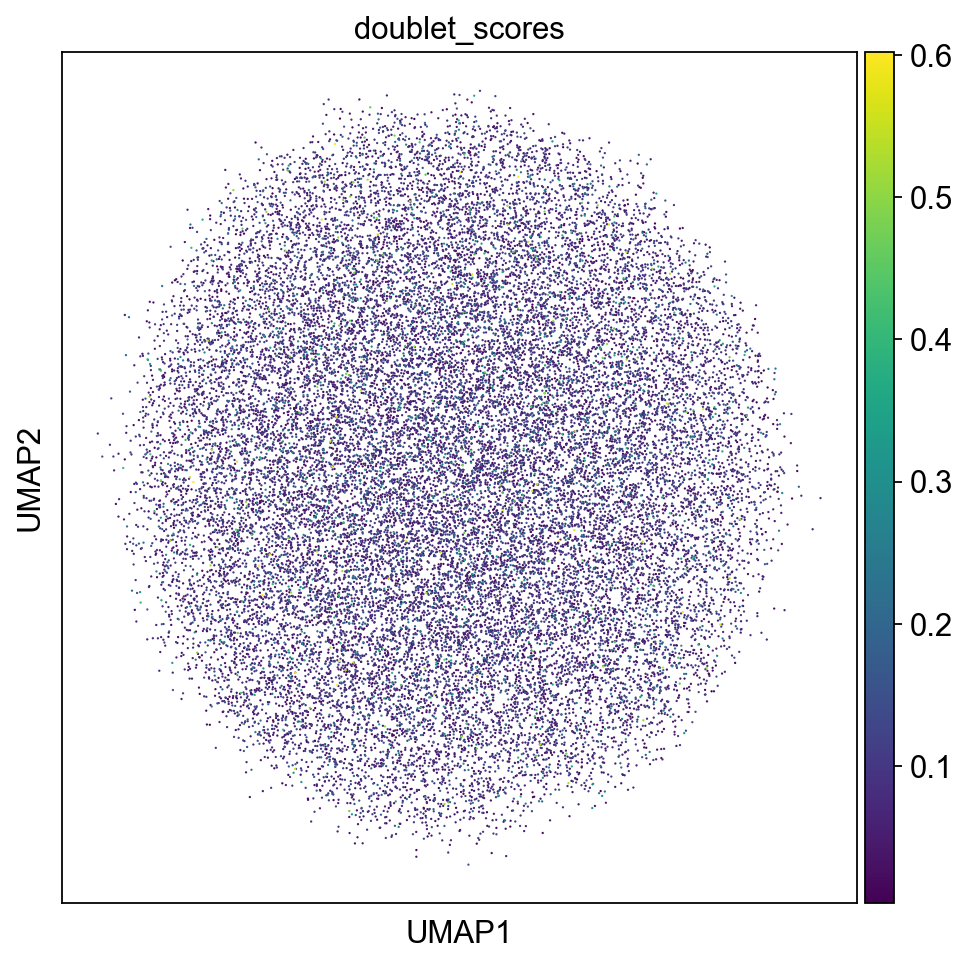

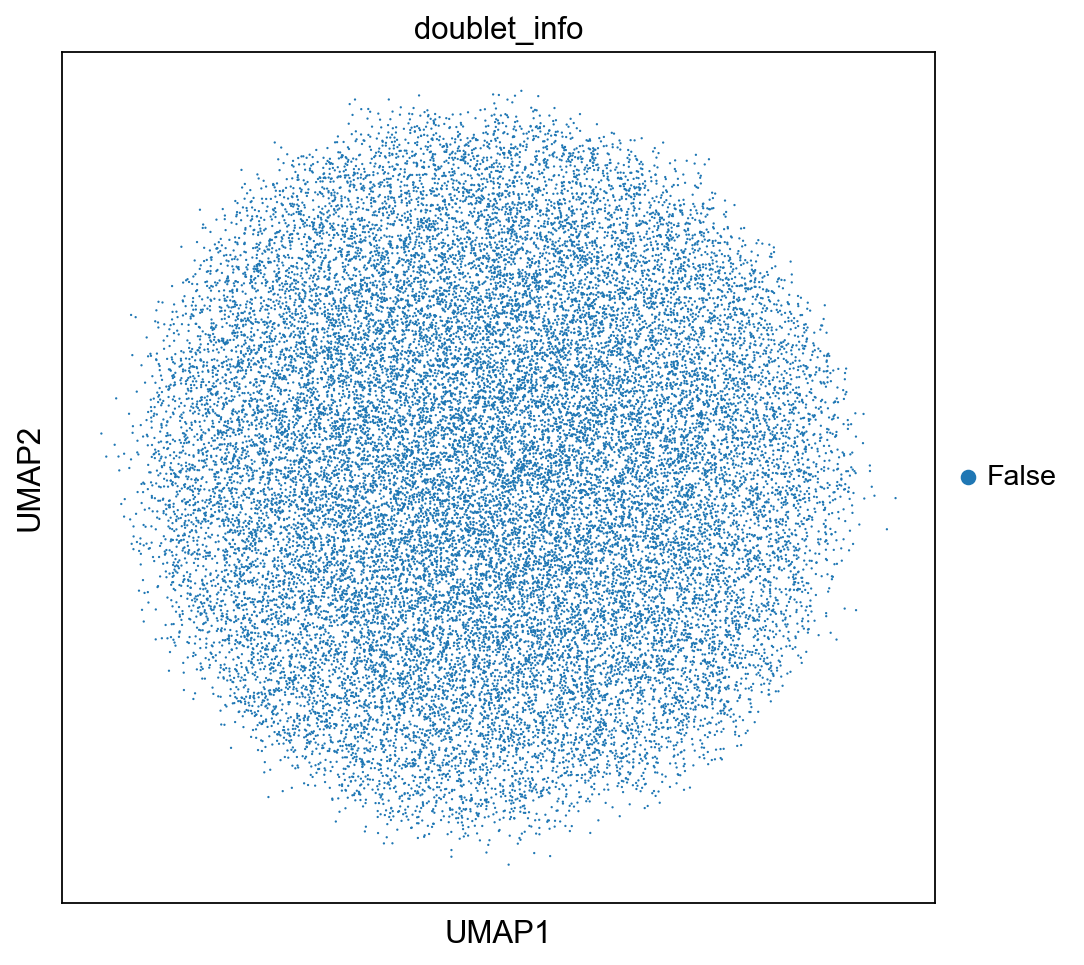

In [64]:
sc.set_figure_params(figsize=(7, 7))
sc.pl.umap(adata, color=["doublet_scores"])
sc.pl.umap(adata, color=["doublet_info"])

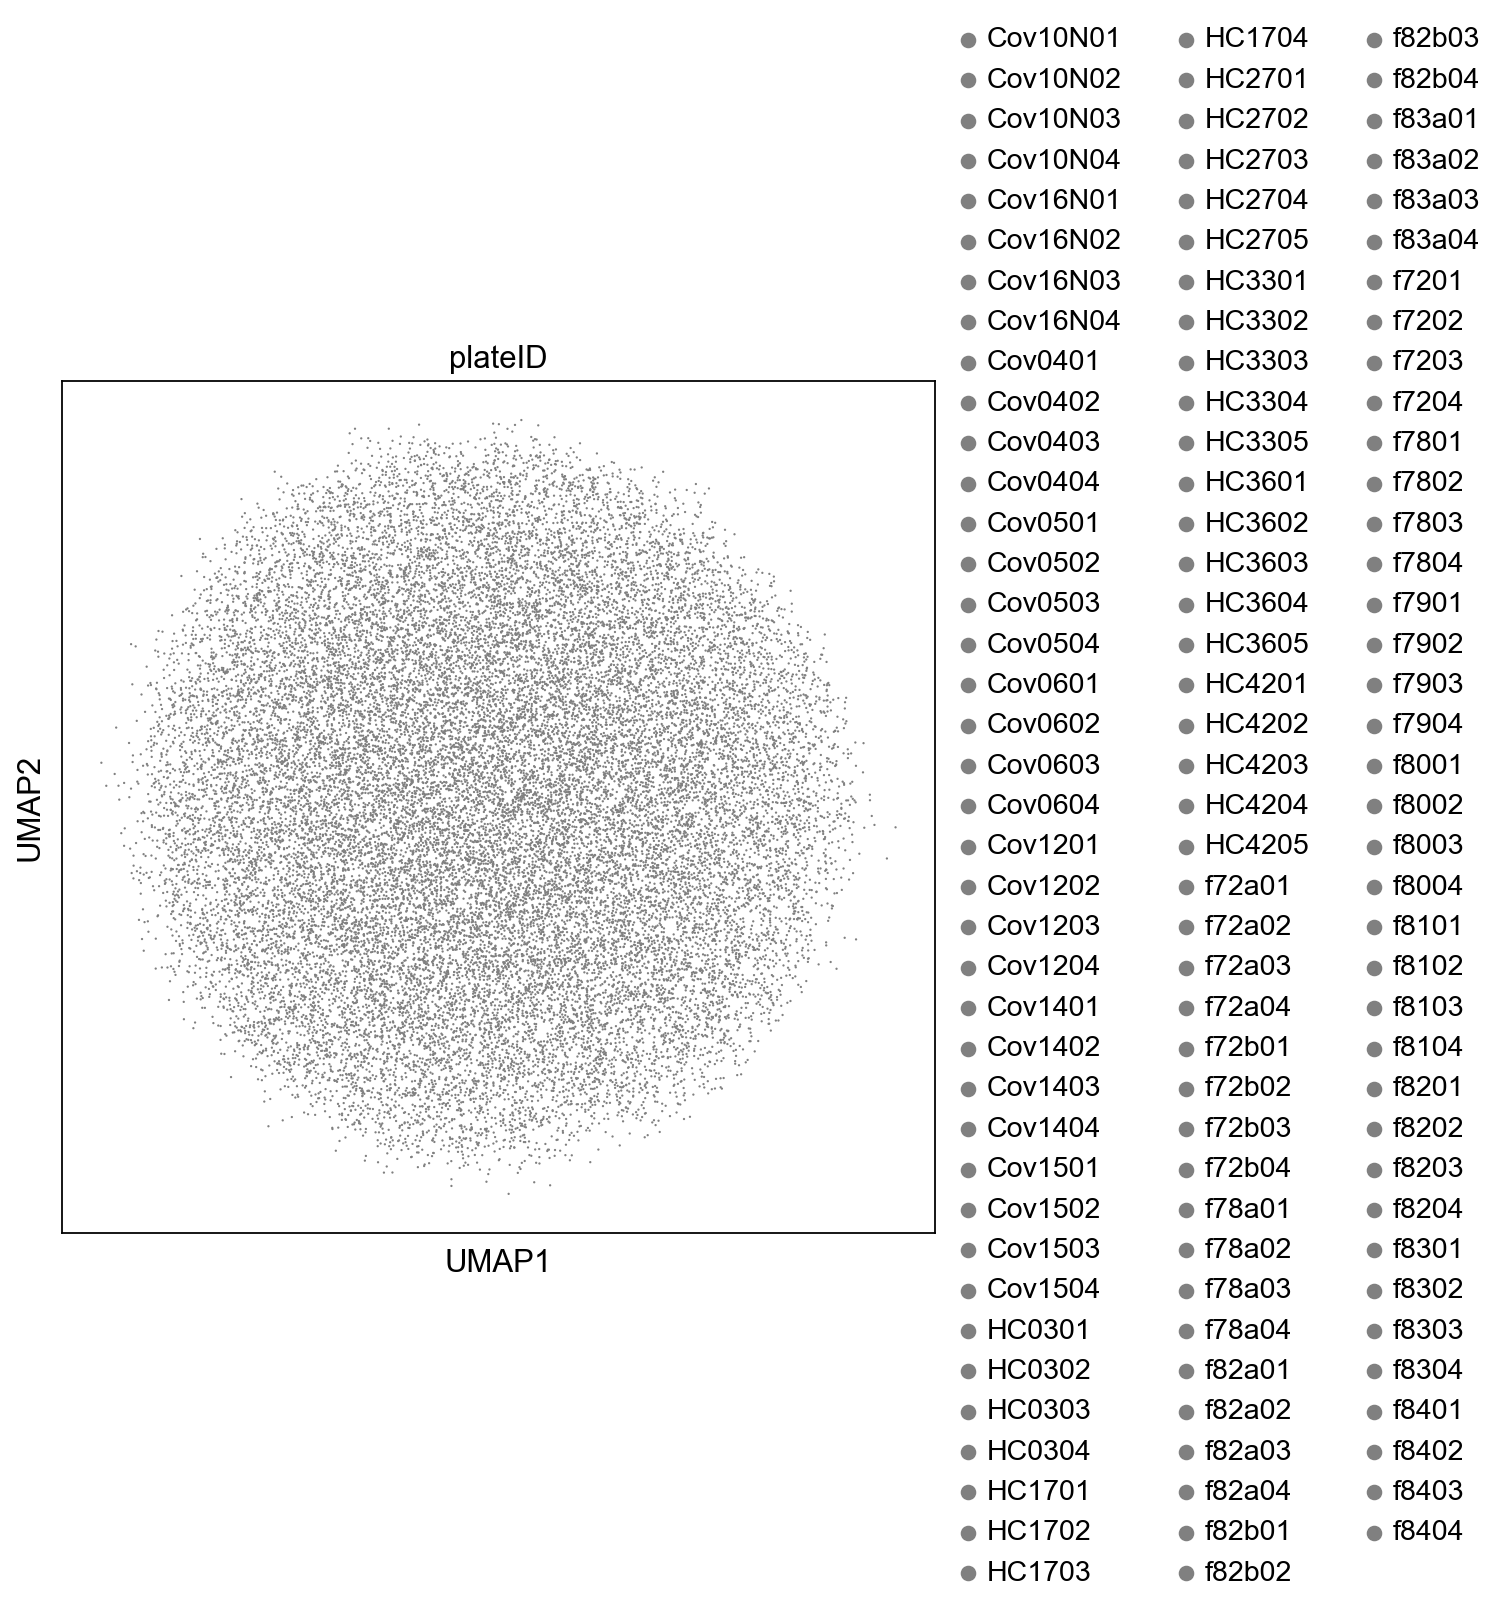

In [65]:
sc.pl.umap(adata, color=["plateID"])

In [66]:
# Make a column named sampleID, which contains the same value as plateID
adata.obs["sampleID"] = adata.obs["plateID"]

In [67]:
count = {'covid': 0, 'flu': 0, 'control': 0}
count_covid_non_covid = {'covid': 0, 'non-covid': 0}
for sample in adata.obs["plateID"].value_counts().index:
    if 'Cov' in sample:
        count['covid']+=1
        count_covid_non_covid['covid']+=1
    elif 'HC' in sample:
        count['control']+=1
        count_covid_non_covid['non-covid']+=1
    else:
        count['flu']+=1
        count_covid_non_covid['non-covid']+=1
        
print(count)
print(count_covid_non_covid)
        

{'covid': 32, 'flu': 56, 'control': 28}
{'covid': 32, 'non-covid': 84}


In [68]:
save_file = "./data/gse176269_input_DP_covid_normalized_preprocessed.h5ad"
adata.write_h5ad(save_file)